In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/task02/train.csv
/kaggle/input/task02/test.csv
/kaggle/input/task02/gender_submission.csv


In [3]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('/kaggle/input/task02/train.csv')

df_clean = df_train.drop(columns=['Cabin', 'Ticket', 'PassengerId'])

median_age = df_clean['Age'].median()
df_clean['Age'].fillna(median_age, inplace=True)

mode_embarked = df_clean['Embarked'].mode()[0] 
df_clean['Embarked'].fillna(mode_embarked, inplace=True)

print("Data Cleaning Complete. All columns now have 891 non-null entries.")
print(df_clean.info())

Data Cleaning Complete. All columns now have 891 non-null entries.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
None


/tmp/ipykernel_47/507162003.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Age'].fillna(median_age, inplace=True)
/tmp/ipykernel_47/507162003.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

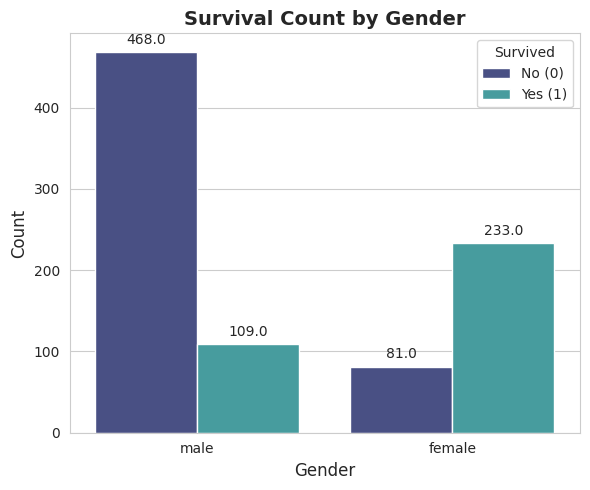

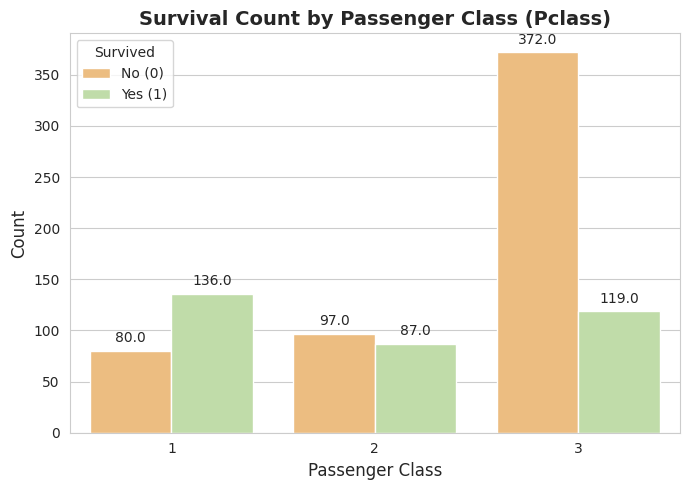

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


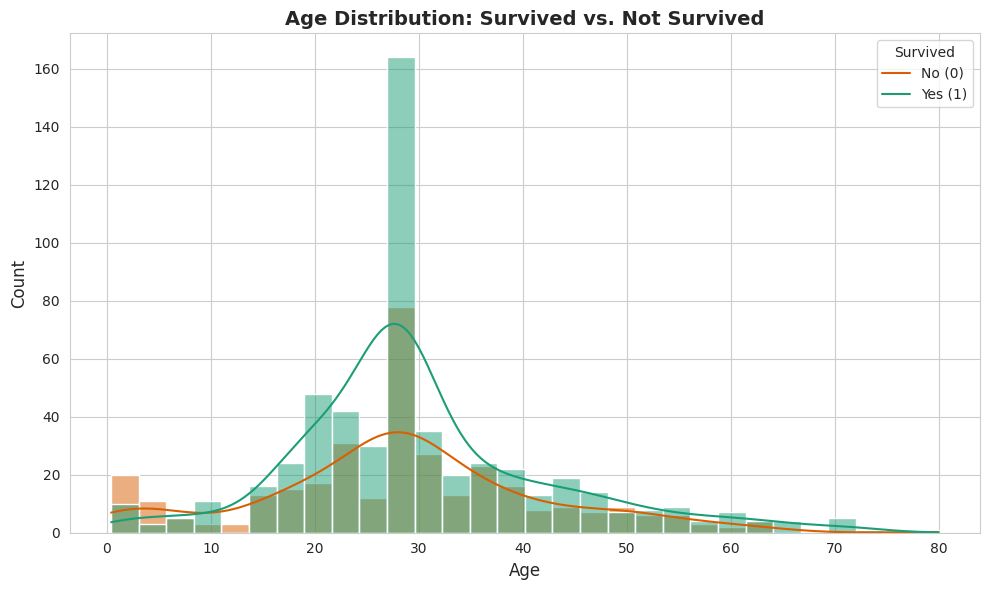

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(6, 5))
ax1 = sns.countplot(x='Sex', hue='Survived', data=df_clean, palette='mako')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 9), textcoords = 'offset points')

plt.title('Survival Count by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.savefig('task_02_survival_by_gender.png')
plt.show()

plt.figure(figsize=(7, 5))
ax2 = sns.countplot(x='Pclass', hue='Survived', data=df_clean, palette='Spectral')

for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 9), textcoords = 'offset points')

plt.title('Survival Count by Passenger Class (Pclass)', fontsize=14, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.savefig('task_02_survival_by_pclass.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='Age', hue='Survived', bins=30, kde=True, palette='Dark2')

plt.title('Age Distribution: Survived vs. Not Survived', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.savefig('task_02_age_distribution_survival.png')
plt.show()

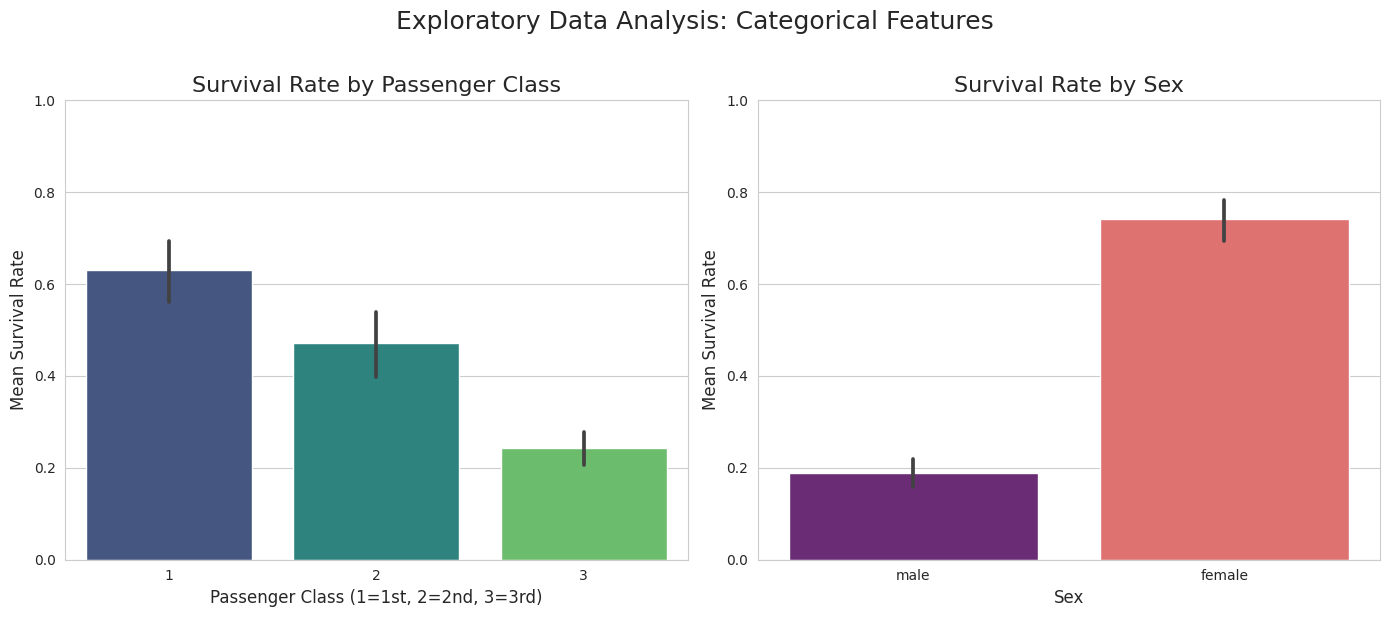

In [8]:

sns.set_style("whitegrid")


fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Survival Rate by Passenger Class', fontsize=16)
axes[0].set_xlabel('Passenger Class (1=1st, 2=2nd, 3=3rd)', fontsize=12)
axes[0].set_ylabel('Mean Survival Rate', fontsize=12)
axes[0].set_ylim(0, 1)


sns.barplot(x='Sex', y='Survived', data=df, ax=axes[1], palette='magma')
axes[1].set_title('Survival Rate by Sex', fontsize=16)
axes[1].set_xlabel('Sex', fontsize=12)
axes[1].set_ylabel('Mean Survival Rate', fontsize=12)
axes[1].set_ylim(0, 1)

plt.suptitle('Exploratory Data Analysis: Categorical Features', fontsize=18, y=1.02)
plt.tight_layout()
plt.savefig('eda_categorical_features.png')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


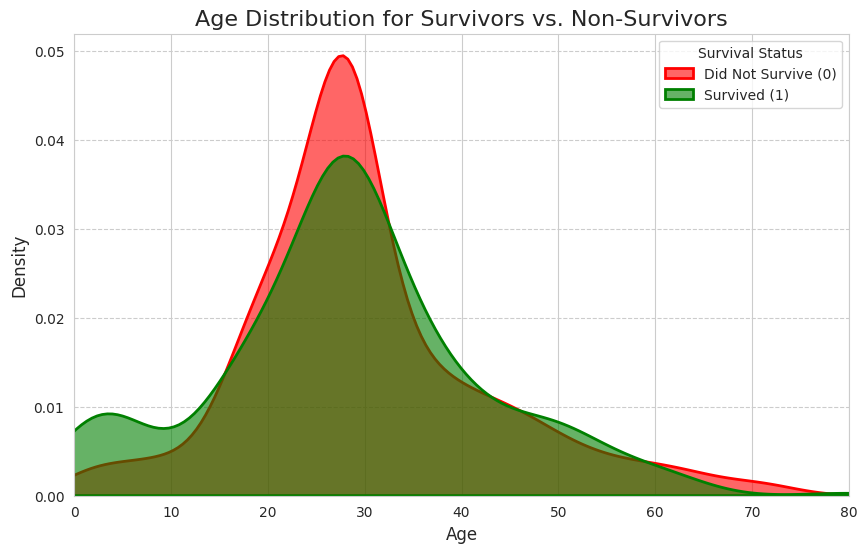

In [9]:

plt.figure(figsize=(10, 6))

sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Did Not Survive (0)', fill=True, color='red', alpha=0.6, linewidth=2)
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived (1)', fill=True, color='green', alpha=0.6, linewidth=2)

plt.title('Age Distribution for Survivors vs. Non-Survivors', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Survival Status', fontsize=10)
plt.xlim(0, 80)
plt.grid(axis='y', linestyle='--')

plt.savefig('eda_age_distribution.png')